In [4]:
import numpy as np
from util.willshaw.memory import *
from util.willshaw.eval import *
from util.mnist.tools import read_mnist
from util.pickleInterface import *
from util.whatwhere.plot import *
from util.whatwhere.noise import *
from util.whatwhere.description_encoding import *
from util.whatwhere.generate import *
from util.whatwhere.decoder import *
from util.plot import *
from util.whatwhere.description_encoding import *

In [5]:
rng = np.random.RandomState(0)  # reproducible
""" Fixed params """
K = 20  # number of k-means centroids
n_epochs = 5  # for the k means feature detection
b = 0.8  # minimum activity of the filters: prevents empty feature detection
Q = 21  # size of the final object space grid
wta = True  # winner takes all

Fs = 2  # size of features, Fs = 1 results in a 3by3 filter size (2Fs+1)
T_what = 0.9  # Treshod for keeping or discarding a detected feature

trn_imgs, trn_lbls, tst_imgs, tst_lbls = read_mnist()
features = compute_features(trn_imgs, trn_lbls, K, Fs, rng, n_epochs, b)
codes, _ = compute_codes(
    trn_imgs,
    K,
    Q,
    features,
    T_what,
    wta,
    n_epochs,
    b,
    Fs,
    set="trn",
)

tst_codes, _ = compute_codes(
    tst_imgs,
    K,
    Q,
    features,
    T_what,
    wta,
    n_epochs,
    b,
    Fs,
    set="tst",
)

In [6]:
size = 10000

codes = codes[:size * 6]
trn_lbls = trn_lbls[:size * 6]
tst_codes = tst_codes[:size]
tst_lbls = tst_lbls[:size]

In [7]:
import matplotlib.pyplot as plt
def plot_class_act(descs, lbls, c):
    s = np.mean(descs[lbls==c], axis=0)
    plt.bar(np.arange(s.shape[0]), s)

In [8]:
# reordering of units had no results
""" sparsity = np.zeros(10)
for i in range(10):
    sparsity[i] = measure_sparsity(codes[trn_lbls==i])[0]
    #print(f"{i}: {sparsity[i]:.5f}")

order = sparsity.argsort()
print(order)
print(sparsity[order])

space_of_zero = space_give_class(0, order)
print(space_of_zero)
zero = class_given_space(space_of_zero,order)
print(zero)
 """


' sparsity = np.zeros(10)\nfor i in range(10):\n    sparsity[i] = measure_sparsity(codes[trn_lbls==i])[0]\n    #print(f"{i}: {sparsity[i]:.5f}")\n\norder = sparsity.argsort()\nprint(order)\nprint(sparsity[order])\n\nspace_of_zero = space_give_class(0, order)\nprint(space_of_zero)\nzero = class_given_space(space_of_zero,order)\nprint(zero)\n '

In [9]:
interval_size1=10
descs1 = x_hot_encoding(trn_lbls, x=interval_size1)
tst_descs1 = x_hot_encoding(tst_lbls, x=interval_size1)

In [10]:
interval_size2=20
descs2 = noisy_x_hot( trn_lbls, n_classes=10, bits_per_class=interval_size2, p_class=0.5, p_rest=0.0)
tst_descs2 = noisy_x_hot( tst_lbls, n_classes=10, bits_per_class=interval_size2, p_class=0.5, p_rest=0.0)

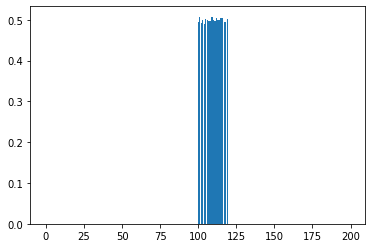

In [11]:
c=5
plot_class_act(descs2, trn_lbls, c)

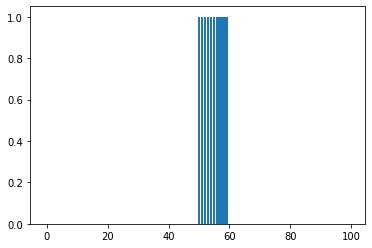

In [12]:
c=5
plot_class_act(descs1, trn_lbls, c)

In [13]:
"""Concatenate descs. to codes and store in memory"""
def join_and_store(descs, codes, tst_descs, tst_codes):
    desc_size = descs.shape[1]
    desCodes = join(descs, codes)
    tst_desCodes = join(tst_descs, tst_codes)
    wn = AAWN(desCodes.shape[1])
    wn.store(desCodes)
    return (desc_size, desCodes, tst_desCodes, wn)

In [15]:
ds1, d_c1, tst_d_c1, wn1 = join_and_store(descs1, codes, tst_descs1, tst_codes)

In [16]:
ds2, d_c2, tst_d_c2, wn2 = join_and_store(descs2, codes, tst_descs2, tst_codes)

In [17]:
"""Evaluate perfection measurements"""
aa_d1, aa_r1 = autoassociation(d_c1, ds1, wn1, verbose=True)
comp_d1, comp_r1 = completion(d_c1, ds1, wn1, verbose=True)
class_d1, class_r1 = classification(tst_d_c1, ds1, wn1, verbose=True)

Perfect autoasso: 100.00


Perfect completion: 14.50 


Perfect classification: 12.38


In [18]:
interval_classifier(aa_r1, trn_lbls, n=interval_size1)
interval_classifier(comp_r1, trn_lbls, n=interval_size1)
interval_classifier(class_r1, tst_lbls, n=interval_size1)

Interval accuracy: 100.00
Interval accuracy: 47.97
Interval accuracy: 44.45


0.4445

In [19]:
"""Evaluate perfection measurements"""
aa_d2, aa_r2 = autoassociation(d_c2, ds2, wn2, verbose=True)
comp_d2, comp_r2 = completion(d_c2, ds2, wn2, verbose=True)
class_d2, class_r2 = classification(tst_d_c2, ds2, wn2, verbose=True)

Perfect autoasso: 7.54


Perfect completion: 2.71 


Perfect classification: 0.00


In [20]:
interval_classifier(aa_r2, trn_lbls, n=interval_size2)
interval_classifier(comp_r2, trn_lbls, n=interval_size2)
interval_classifier(class_r2, tst_lbls, n=interval_size2)

Interval accuracy: 100.00
Interval accuracy: 77.55
Interval accuracy: 72.47


0.7247

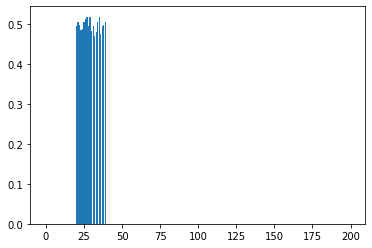

In [21]:
c = 1
plot_class_act(class_d2, tst_lbls, c)

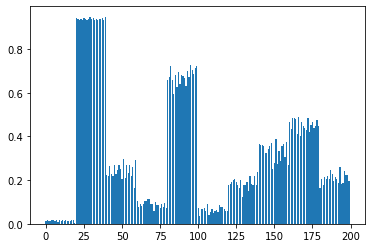

In [22]:
c = 1
plot_class_act(class_r2, tst_lbls, c)